<a href="https://colab.research.google.com/github/Eeshaan-Dutt/LicensePlateDetector/blob/master/SmartEyeofTrafficSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following Cell links the Colab notebook to the personal Google drive**(for the Account in use)**

The Cell Basically requires Authentication Procedure in order to get started with using drive as your Cloud Storage

In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***The Cell Lists out the contents of the drive in any sub-folder listed in the path:***

In [27]:
import os 
os.listdir("/content/drive/My Drive/ANPRTestData")

['test(1).jpg',
 'SS1.png',
 'test3.jpg',
 'test4.JPG',
 'car2.jpg',
 'Final.JPG',
 'test2.jpg',
 'test.jpeg',
 'test1.jpg',
 'test.JPG',
 '4.png',
 '6.png',
 '14.png',
 '11.png',
 '12.png',
 '7.png',
 '9.png',
 '16.png',
 '5.png',
 '2.png',
 '13.png',
 '3.png',
 '8.png',
 '10.png',
 '15.png',
 '1.png',
 '17.png',
 '18.png']

In [28]:
path_list = []
for element in os.listdir("/content/drive/My Drive/ANPRTestData"):
  img_path = "{}/{}".format("/content/drive/My Drive/ANPRTestData", element)
  print(img_path)
  path_list.append(img_path)

/content/drive/My Drive/ANPRTestData/test(1).jpg
/content/drive/My Drive/ANPRTestData/SS1.png
/content/drive/My Drive/ANPRTestData/test3.jpg
/content/drive/My Drive/ANPRTestData/test4.JPG
/content/drive/My Drive/ANPRTestData/car2.jpg
/content/drive/My Drive/ANPRTestData/Final.JPG
/content/drive/My Drive/ANPRTestData/test2.jpg
/content/drive/My Drive/ANPRTestData/test.jpeg
/content/drive/My Drive/ANPRTestData/test1.jpg
/content/drive/My Drive/ANPRTestData/test.JPG
/content/drive/My Drive/ANPRTestData/4.png
/content/drive/My Drive/ANPRTestData/6.png
/content/drive/My Drive/ANPRTestData/14.png
/content/drive/My Drive/ANPRTestData/11.png
/content/drive/My Drive/ANPRTestData/12.png
/content/drive/My Drive/ANPRTestData/7.png
/content/drive/My Drive/ANPRTestData/9.png
/content/drive/My Drive/ANPRTestData/16.png
/content/drive/My Drive/ANPRTestData/5.png
/content/drive/My Drive/ANPRTestData/2.png
/content/drive/My Drive/ANPRTestData/13.png
/content/drive/My Drive/ANPRTestData/3.png
/content/dr

The Following List consists of all the paths of the images stored in the database


In [29]:
print(path_list)

['/content/drive/My Drive/ANPRTestData/test(1).jpg', '/content/drive/My Drive/ANPRTestData/SS1.png', '/content/drive/My Drive/ANPRTestData/test3.jpg', '/content/drive/My Drive/ANPRTestData/test4.JPG', '/content/drive/My Drive/ANPRTestData/car2.jpg', '/content/drive/My Drive/ANPRTestData/Final.JPG', '/content/drive/My Drive/ANPRTestData/test2.jpg', '/content/drive/My Drive/ANPRTestData/test.jpeg', '/content/drive/My Drive/ANPRTestData/test1.jpg', '/content/drive/My Drive/ANPRTestData/test.JPG', '/content/drive/My Drive/ANPRTestData/4.png', '/content/drive/My Drive/ANPRTestData/6.png', '/content/drive/My Drive/ANPRTestData/14.png', '/content/drive/My Drive/ANPRTestData/11.png', '/content/drive/My Drive/ANPRTestData/12.png', '/content/drive/My Drive/ANPRTestData/7.png', '/content/drive/My Drive/ANPRTestData/9.png', '/content/drive/My Drive/ANPRTestData/16.png', '/content/drive/My Drive/ANPRTestData/5.png', '/content/drive/My Drive/ANPRTestData/2.png', '/content/drive/My Drive/ANPRTestData

The Cell basically is a cut-copy version of statements to capture images from inbuilt Webcam. For Real Time capturing purposes, the cell would be capturing images.

Following 3 cells have function of capturing Live images, and showing them

In [30]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

In [31]:
img = take_photo()

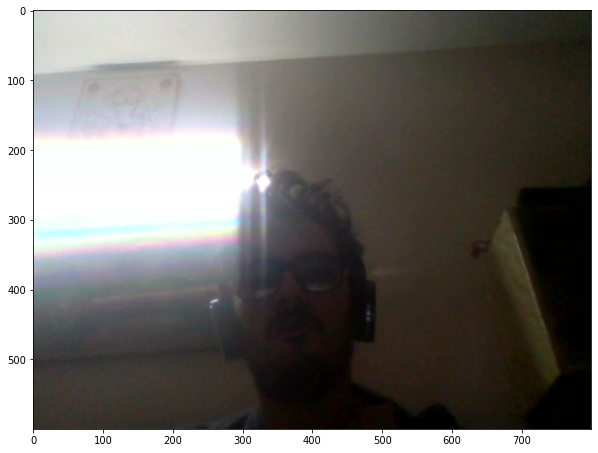

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

**Concept: The os.(Commands) are basically aimed to capture real time images, store them to the target/ destination and then later to be accessed by the script to be operated on.**

In [33]:
os.mkdir("/content/drive/My Drive/ANPRResults")

FileExistsError: ignored

In [34]:
os.listdir("/content/drive/My Drive/ANPRResults")

[]

For testing purposes, the Following cell accesses the images from the Target Directory(target_dir) (Our Own Google Drive itself)

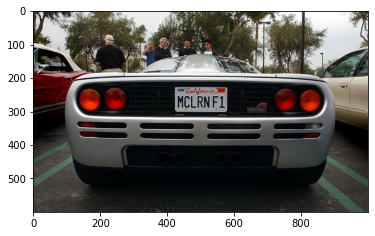

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
target_dir = "/content/drive/My Drive/ANPRTestData/1.png"
img = Image.open(target_dir)
plt.imshow(img)


In [56]:
def plot_images(img1, img2, title1="", title2=""):
  fig = plt.figure(figsize=[15, 15])
  ax1 = fig.add_subplot(121)
  ax1.imshow(img1, cmap="gray")
  ax1.set(xticks=[], yticks=[], title=title1)

  ax2 = fig.add_subplot(122)
  ax2.imshow(img2, cmap="gray")
  ax2.set(xticks=[], yticks=[], title=title2)

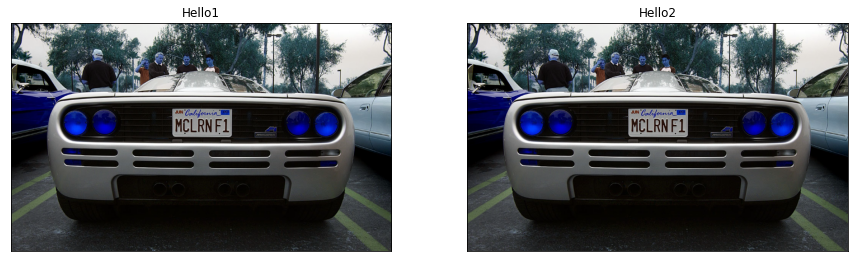

In [57]:
import cv2
img = cv2.imread(target_dir)
plot_images(img, img, title1="Hello1", title2= "Hello2")

In [58]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

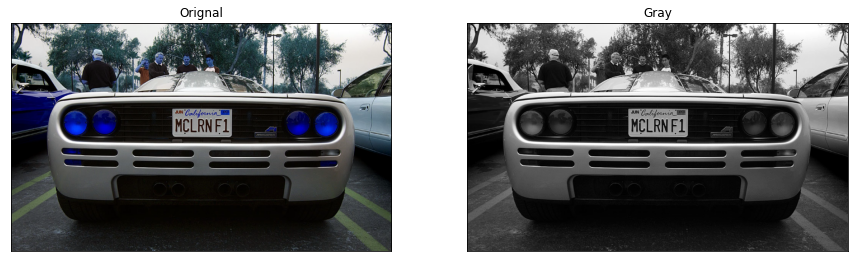

In [59]:
plot_images(img, gray, title1= "Orignal", title2= "Gray")

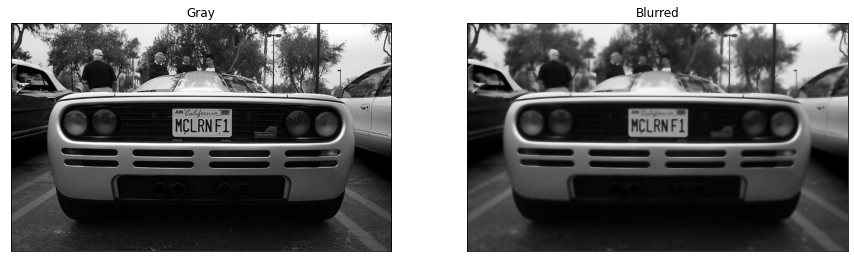

In [60]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)
plot_images(gray, blur, title1= "Gray", title2= "Blurred")

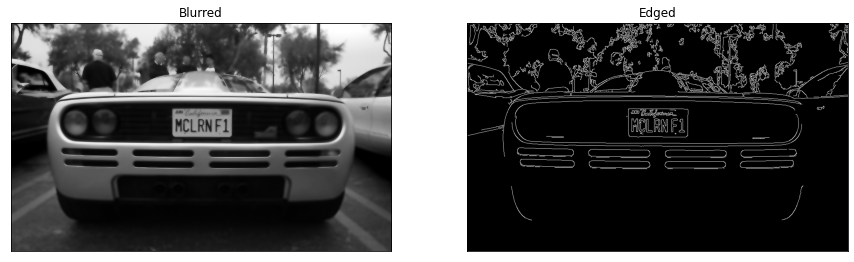

In [61]:
edges = cv2.Canny(blur, 30, 200)
plot_images(blur, edges, title1= "Blurred", title2= "Edged")

In [62]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [63]:
image_copy = img.copy()

In [64]:
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 2)

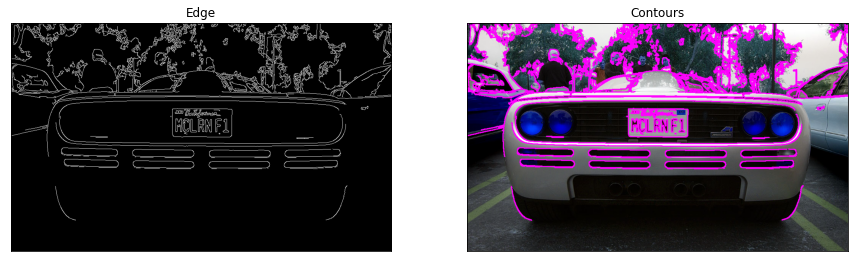

In [65]:
plot_images(edges, image_copy, title1= "Edge", title2= "Contours")

In [69]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

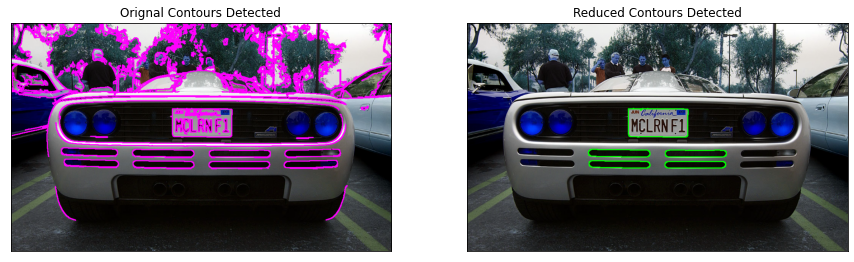

In [70]:
image_reduced_cnts = img.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (0, 255, 0), 2)
plot_images(image_copy, image_reduced_cnts, title1 = "Orignal Contours Detected", title2 = "Reduced Contours Detected")

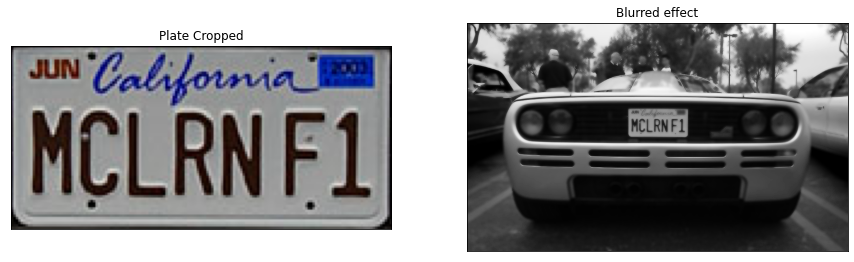

In [71]:
plate = None
for c in cnts:
  perimeter = cv2.arcLength(c, True)
  edges_count = cv2.approxPolyDP(c, 0.02*perimeter, True)
  if len(edges_count) == 4:
    x, y, w, h = cv2.boundingRect(c)
    plate = img[y:y+h, x:x+w]
    break
cv2.imwrite("plate.jpg", plate)
plot_images(plate, blur, title1="Plate Cropped", title2 = "Blurred effect")